In [1]:
base_path = '/Users/Saravanan/patient data/'  


In [6]:
import os

# Set base path to the directory containing patient files
base_path = '/Users/Saravanan/patient data/'

# List all files in the directory
print("Files in directory:")
for file in os.listdir(base_path):
    print(file)


Files in directory:
318_TRANSCRIPT.csv
304_COVAREP.csv
318_COVAREP.csv
310_TRANSCRIPT.csv
310_FORMANT.csv
319_FORMANT.csv
dev_split_Depression_AVEC2017.csv
303_TRANSCRIPT.csv
304_TRANSCRIPT.csv
327_FORMANT.csv
357_FORMANT.csv
319_TRANSCRIPT.csv
Untitled.ipynb
338_FORMANT.csv
330_COVAREP.csv
331_FORMANT.csv
325_COVAREP.csv
train_split_Depression_AVEC2017.csv
303_FORMANT.csv
full_test_split.csv
320_COVAREP.csv
321_FORMANT.csv
329_COVAREP.csv
test_split_Depression_AVEC2017.csv
357_TRANSCRIPT.csv
357_COVAREP.csv
321_TRANSCRIPT.csv
327_COVAREP.csv
310_COVAREP.csv
318_FORMANT.csv
320_TRANSCRIPT.csv
304_FORMANT.csv
319_COVAREP.csv
327_TRANSCRIPT.csv
320_FORMANT.csv
330_TRANSCRIPT.csv
325_TRANSCRIPT.csv
.ipynb_checkpoints
338_TRANSCRIPT.csv
329_FORMANT.csv
321_COVAREP.csv
330_FORMANT.csv
338_COVAREP.csv
303_COVAREP.csv
325_FORMANT.csv
331_TRANSCRIPT.csv
331_COVAREP.csv


In [7]:
import pandas as pd
import os

# Base path to your patient data folder
base_path = '/Users/Saravanan/patient data/'

# List of patient IDs you want to load
patient_ids = ['318', '331', '357']

# Dictionary to hold data for each patient separately
patient_data = {}

for pid in patient_ids:
    try:
        covarep_file = os.path.join(base_path, f'{pid}_COVAREP.csv')
        formant_file = os.path.join(base_path, f'{pid}_FORMANT.csv')
        transcript_file = os.path.join(base_path, f'{pid}_TRANSCRIPT.csv')

        df_covarep = pd.read_csv(covarep_file)
        df_formant = pd.read_csv(formant_file)
        df_transcript = pd.read_csv(transcript_file, sep='\t', header=None)

        # Store each patient's data as a dictionary
        patient_data[pid] = {
            'COVAREP': df_covarep,
            'FORMANT': df_formant,
            'TRANSCRIPT': df_transcript
        }

        print(f"Loaded data for patient {pid}")

    except Exception as e:
        print(f"Error loading data for patient {pid}: {e}")


Loaded data for patient 318
Loaded data for patient 331
Loaded data for patient 357


In [8]:
for pid in patient_ids:
    print(f"\nColumns in COVAREP file for patient {pid}:")
    print(patient_data[pid]['COVAREP'].columns.tolist())



Columns in COVAREP file for patient 318:
['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '-11.775', '1.7688', '0.69586', '0.54806', '0.16832', '0.34717', '0.1953', '0.13883', '0.063442', '0.14562', '0.14221', '0.12138', '0.077443', '-0.020608', '-0.08613', '0.0050058', '0.11018', '0.081392', '0.0015804', '-0.052189', '-0.10872', '-0.055961', '0.023782', '0.13418', '-0.011934', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31', '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.43', '0.44', '0.45', '0.46', '0.47', '0.48']

Columns in COVAREP file for patient 331:
['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '-11.77', '1.5532', '0.40659', '0.42698', '0.28121', '0.34516', '0.28466', '0.36227', '0.27977', '0.18105', '0.075733', '0.085972', '0.023151', '0.15264', '0.040617', 

In [9]:
import os
import pandas as pd

base_path = '/Users/Saravanan/patient data/'

patient_ids = ['318', '331', '357']
patient_data = {}

for pid in patient_ids:
    try:
        covarep_path = os.path.join(base_path, f"{pid}_COVAREP.csv")
        formant_path = os.path.join(base_path, f"{pid}_FORMANT.csv")
        transcript_path = os.path.join(base_path, f"{pid}_TRANSCRIPT.csv")

        # Load CSVs with header=None
        covarep_df = pd.read_csv(covarep_path, header=None)
        formant_df = pd.read_csv(formant_path, header=None)
        transcript_df = pd.read_csv(transcript_path)

        patient_data[pid] = {
            'COVAREP': covarep_df,
            'FORMANT': formant_df,
            'TRANSCRIPT': transcript_df
        }

        print(f"✅ Loaded data for patient {pid}")
    except Exception as e:
        print(f"❌ Error loading patient {pid}: {e}")


✅ Loaded data for patient 318
✅ Loaded data for patient 331
✅ Loaded data for patient 357


In [10]:
processed_dfs = []

for pid in patient_ids:
    try:
        covarep_df = patient_data[pid]['COVAREP']
        formant_df = patient_data[pid]['FORMANT']

        # Add frame indices as a time reference
        covarep_df['frame'] = range(len(covarep_df))
        formant_df['frame'] = range(len(formant_df))

        # Merge COVAREP and FORMANT on frame number
        merged_df = pd.merge(covarep_df, formant_df, on='frame', suffixes=('_covarep', '_formant'))

        # Add patient ID for later labeling
        merged_df['patient_id'] = pid

        processed_dfs.append(merged_df)
        print(f"✅ Preprocessed patient {pid}")

    except Exception as e:
        print(f"❌ Error preprocessing patient {pid}: {e}")


✅ Preprocessed patient 318
✅ Preprocessed patient 331
✅ Preprocessed patient 357


In [11]:
# Combine all patient data into a single DataFrame
combined_df = pd.concat(processed_dfs, ignore_index=True)

# Show shape and basic info
print("✅ Combined dataset shape:", combined_df.shape)
combined_df.head()


✅ Combined dataset shape: (185389, 81)


,0_covarep,1_covarep,2_covarep,3_covarep,4_covarep,5,6,7,8,9,...,71,72,73,frame,0_formant,1_formant,2_formant,3_formant,4_formant,patient_id
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0,818.07,1799.0,2622.4,3508.4,4171.6,318
1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,1,675.59,1625.1,2620.0,3510.4,4388.1,318
2,0.0,0,0.0,0.0,0.0,0.0,0.0,-0.37861,0.0,0.0,...,0.0,0.0,0.0,2,849.31,1829.5,3266.4,3952.6,4875.4,318
3,0.0,0,0.0,0.0,0.0,0.0,0.0,-0.39150,0.0,0.0,...,0.0,0.0,0.0,3,915.31,2251.2,3431.1,3984.0,4716.6,318
4,0.0,0,0.0,0.0,0.0,0.0,0.0,-0.39443,0.0,0.0,...,0.0,0.0,0.0,4,862.92,1933.0,3046.8,3675.4,4373.7,318


In [12]:
# Load the PHQ8 scores file
phq8_df = pd.read_csv(base_path + 'train_split_Depression_AVEC2017.csv')

# Keep only the relevant columns and rename for merging
phq8_df = phq8_df[['Participant_ID', 'PHQ8_Score']].rename(columns={'Participant_ID': 'patient_id'})

# Convert patient_id in combined_df to int if it's not already
combined_df['patient_id'] = combined_df['patient_id'].astype(int)

# Merge the PHQ8 scores with the combined feature dataframe
data_labeled = combined_df.merge(phq8_df, on='patient_id', how='inner')

# Confirm merge
print("✅ Final labeled dataset shape:", data_labeled.shape)
data_labeled.head()


✅ Final labeled dataset shape: (100319, 82)


,0_covarep,1_covarep,2_covarep,3_covarep,4_covarep,5,6,7,8,9,...,72,73,frame,0_formant,1_formant,2_formant,3_formant,4_formant,patient_id,PHQ8_Score
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0,818.07,1799.0,2622.4,3508.4,4171.6,318,3
1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,1,675.59,1625.1,2620.0,3510.4,4388.1,318,3
2,0.0,0,0.0,0.0,0.0,0.0,0.0,-0.37861,0.0,0.0,...,0.0,0.0,2,849.31,1829.5,3266.4,3952.6,4875.4,318,3
3,0.0,0,0.0,0.0,0.0,0.0,0.0,-0.39150,0.0,0.0,...,0.0,0.0,3,915.31,2251.2,3431.1,3984.0,4716.6,318,3
4,0.0,0,0.0,0.0,0.0,0.0,0.0,-0.39443,0.0,0.0,...,0.0,0.0,4,862.92,1933.0,3046.8,3675.4,4373.7,318,3


In [13]:
from sklearn.model_selection import train_test_split

# Drop any rows with missing values (if any)
data_labeled = data_labeled.dropna()

# Separate features and target label
X = data_labeled.drop(columns=['patient_id', 'PHQ8_Score'])  # Features only
y = data_labeled['PHQ8_Score']  # Target variable

print(f"Features shape: {X.shape}, Target shape: {y.shape}")

# Split into train and test (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Features shape: (100319, 80), Target shape: (100319,)
Train shape: (80255, 80), Test shape: (20064, 80)


In [14]:
# Assuming 'PHQ8_Score' column exists in your labeled data
data_labeled['PHQ8_binary'] = data_labeled['PHQ8_Score'].apply(lambda x: 1 if x >= 10 else 0)


In [15]:
X = data_labeled.drop(['PHQ8_Score', 'PHQ8_binary', 'patient_id'], axis=1)
y = data_labeled['PHQ8_binary']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_binary)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test_binary, y_pred))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_binary, y_pred))


/Users/Saravanan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20064

    accuracy                           1.00     20064
   macro avg       1.00      1.00      1.00     20064
weighted avg       1.00      1.00      1.00     20064


Confusion Matrix:
 [[20064]]


/Users/Saravanan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
print("Train label counts:\n", y_train_binary.value_counts())
print("Test label counts:\n", y_test_binary.value_counts())


Train label counts:
 0    80255
Name: PHQ8_binary, dtype: int64
Test label counts:
 0    20064
Name: PHQ8_binary, dtype: int64


In [19]:
import pandas as pd

# Path to your label CSV file
labels_path = '/Users/Saravanan/patient data/train_split_Depression_AVEC2017.csv'

# Load PHQ8 scores
phq8_df = pd.read_csv(labels_path)

# Check columns and first few rows to understand structure
print(phq8_df.columns)
print(phq8_df.head())

# Filter patients with PHQ8 score >= 10 (positive class)
positive_patients = phq8_df[phq8_df['PHQ8_Score'] >= 10]['Participant_ID'].unique()

print(f"Number of positive cases: {len(positive_patients)}")
print("Sample positive patient IDs:", positive_patients[:10])


Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender',
       'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
       'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving'],
      dtype='object')
   Participant_ID  PHQ8_Binary  PHQ8_Score  Gender  PHQ8_NoInterest  \
0             303            0           0       0                0   
1             304            0           6       0                0   
2             305            0           7       1                0   
3             310            0           4       1                1   
4             312            0           2       1                0   

   PHQ8_Depressed  PHQ8_Sleep  PHQ8_Tired  PHQ8_Appetite  PHQ8_Failure  \
0               0         0.0           0              0             0   
1               1         1.0           2              2             0   
2               1         1.0           2              2             1   
3               1         0.0           0

In [ ]:
# until here we performed sample implementation

In [ ]:
# actual implementation considering 10 patients

In [20]:
import os

base_path = '/Users/Saravanan/patient data/'

patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318, 312, 327]
file_types = ['COVAREP', 'FORMANT', 'TRANSCRIPT']

existing_files = {}

for pid in patient_ids:
    existing_files[pid] = {}
    for ftype in file_types:
        filename = f"{pid}_{ftype}.csv"
        filepath = os.path.join(base_path, filename)
        existing_files[pid][ftype] = os.path.exists(filepath)

# Print summary
for pid, files in existing_files.items():
    print(f"Patient {pid}:")
    for ftype, exists in files.items():
        print(f"  {ftype}: {'Found' if exists else 'Missing'}")


Patient 319:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 320:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 321:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 325:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 330:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 338:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 303:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 304:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 310:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 318:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found
Patient 312:
  COVAREP: Missing
  FORMANT: Missing
  TRANSCRIPT: Missing
Patient 327:
  COVAREP: Found
  FORMANT: Found
  TRANSCRIPT: Found


In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

# Audio branch input and layers
audio_input = Input(shape=(74,), name='audio_input')
x_audio = Dense(128, activation='relu')(audio_input)
x_audio = Dropout(0.3)(x_audio)
x_audio = Dense(64, activation='relu')(x_audio)

# Text branch input and layers
text_input = Input(shape=(768,), name='text_input')
x_text = Dense(256, activation='relu')(text_input)
x_text = Dropout(0.3)(x_text)
x_text = Dense(128, activation='relu')(x_text)

# Fusion
merged = Concatenate()([x_audio, x_text])
x = Dense(128, activation='relu')(merged)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)

# Output layer: Binary classification (depressed / not)
output = Dense(1, activation='sigmoid', name='output')(x)

# Model definition
model = Model(inputs=[audio_input, text_input], outputs=output)

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


2025-05-15 21:05:31.706991: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ audio_input         │ (None, 74)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 768)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      9,600 │ audio_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    196,864 │ text_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     32,896 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     24,704 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 280,641 (1.07 MB)

 Trainable params: 280,641 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import tensorflow as tf
import numpy as np

# Load pretrained model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

def get_text_embedding(text):
    # Tokenize text, return tensors, pad/truncate to max length 128 tokens (adjustable)
    inputs = tokenizer(text, return_tensors='tf', max_length=128, truncation=True, padding='max_length')
    outputs = distilbert_model(**inputs)
    
    # outputs.last_hidden_state shape: (batch_size, sequence_length, hidden_size)
    # Take [CLS] token embedding (first token) as sentence embedding
    cls_embedding = outputs.last_hidden_state[:, 0, :]
    return cls_embedding.numpy().flatten()

# Example usage:
sample_text = "I feel very tired and have lost interest in activities."
embedding = get_text_embedding(sample_text)
print("Embedding shape:", embedding.shape)  # Should be (768,)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Embedding shape: (768,)


In [ ]:
AUDIO tagging from here

In [23]:
import os
import pandas as pd

base_path = '/Users/Saravanan/patient data/'
patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318, 327, 325, 303]

transcripts_dict = {}

for pid in set(patient_ids):
    transcript_path = os.path.join(base_path, f"{pid}_TRANSCRIPT.csv")
    if os.path.exists(transcript_path):
        try:
            df = pd.read_csv(transcript_path, sep='\t')
            if 'value' in df.columns:
                transcript_text = " ".join(df['value'].astype(str))
                transcripts_dict[pid] = transcript_text
            else:
                print(f"⚠️ Column 'value' missing in {transcript_path}")
        except Exception as e:
            print(f"❌ Failed to read {transcript_path}: {e}")
    else:
        print(f"❌ Transcript file not found for patient {pid}")




In [24]:
text_embeddings = {}
for pid, text in transcripts_dict.items():
    try:
        embedding = get_text_embedding(text)
        text_embeddings[pid] = embedding
        print(f"✅ Embedded transcript for patient {pid}")
    except Exception as e:
        print(f"❌ Failed embedding for patient {pid}: {e}")


✅ Embedded transcript for patient 320
✅ Embedded transcript for patient 321
✅ Embedded transcript for patient 325
✅ Embedded transcript for patient 327
✅ Embedded transcript for patient 330
✅ Embedded transcript for patient 303
✅ Embedded transcript for patient 304
✅ Embedded transcript for patient 338
✅ Embedded transcript for patient 310
✅ Embedded transcript for patient 318
✅ Embedded transcript for patient 319


In [28]:
covarep_path = os.path.join(base_path, "319_COVAREP.csv")

# Try reloading the file with no headers
df = pd.read_csv(covarep_path, header=None)
print("Shape:", df.shape)
print("First few rows:")
print(df.head())


Shape: (67971, 74)
First few rows:
    0   1    2    3    4    5    6        7    8    9   ...   64   65   66  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0 -0.24899  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0 -0.25096  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0 -0.24684  0.0  0.0  ...  0.0  0.0  0.0   

    67   68   69   70   71   72   73  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 74 columns]


In [29]:
# Assuming it's valid numerical data
if df.shape[0] > 0:
    feature_vector = df.mean(axis=0).values
    print("Extracted feature vector shape:", feature_vector.shape)
else:
    print("File is empty or not usable.")


Extracted feature vector shape: (74,)


In [31]:
# List of patients confirmed to have usable audio + text data
usable_patients = [320, 327, 330, 338, 318]  # update as needed

X = []
y = []
matched_patients = []

for pid in usable_patients:
    try:
        # Load audio features (adjust loading function to your setup)
        audio_feat = load_audio_features(pid)  # your custom function
        
        # Load transcript and get text embedding (you already have get_text_embedding)
        transcript_text = load_transcript_text(pid)  # your custom function
        text_embed = get_text_embedding(transcript_text)
        
        # Combine audio + text features
        combined_feat = np.concatenate([audio_feat, text_embed])
        
        # Get label from label file (you have this part working)
        label = get_label_for_patient(pid)  # returns 0 or 1
        
        X.append(combined_feat)
        y.append(label)
        matched_patients.append(pid)
        
    except Exception as e:
        print(f"Skipping patient {pid} due to error: {e}")

X = np.array(X)
y = np.array(y)

print(f"Prepared features and labels for {len(matched_patients)} patients: {matched_patients}")


Skipping patient 320 due to error: name 'load_audio_features' is not defined
Skipping patient 327 due to error: name 'load_audio_features' is not defined
Skipping patient 330 due to error: name 'load_audio_features' is not defined
Skipping patient 338 due to error: name 'load_audio_features' is not defined
Skipping patient 318 due to error: name 'load_audio_features' is not defined
Prepared features and labels for 0 patients: []


In [ ]:
#audio data is messy, hence i stopped

In [32]:
import os
import pandas as pd
import numpy as np

base_path = '/Users/Saravanan/patient data/'

def load_audio_features(patient_id):
    filename = os.path.join(base_path, f"{patient_id}_COVAREP.csv")
    if not os.path.exists(filename):
        raise FileNotFoundError(f"Audio feature file not found for patient {patient_id}")
    
    df = pd.read_csv(filename)
    
    # You mentioned columns can be messy, so let's just take numeric columns only
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) == 0:
        raise ValueError(f"No numeric columns found in audio feature file for patient {patient_id}")
    
    # Option 1: Take mean of numeric features across all rows as feature vector
    features = df[numeric_cols].mean(axis=0).values
    
    return features


In [33]:
def load_transcript_text(patient_id):
    filename = os.path.join(base_path, f"{patient_id}_TRANSCRIPT.csv")
    if not os.path.exists(filename):
        raise FileNotFoundError(f"Transcript file not found for patient {patient_id}")
    
    df = pd.read_csv(filename)
    
    if 'value' not in df.columns:
        raise ValueError(f"Column 'value' missing in transcript file for patient {patient_id}")
    
    # Join all participant speech as one text block for embedding
    participant_texts = df[df['speaker'] == 'Participant']['value'].dropna().tolist()
    combined_text = " ".join(participant_texts)
    
    if combined_text.strip() == "":
        raise ValueError(f"No valid participant text found in transcript for patient {patient_id}")
    
    return combined_text


In [34]:
def get_label_for_patient(patient_id):
    # assuming labels_df is already loaded outside this function
    row = labels_df[labels_df['Participant_ID'] == patient_id]
    if row.empty:
        raise ValueError(f"No label found for patient {patient_id}")
    return int(row['PHQ8_Binary'].values[0])  # or adjust column name accordingly


In [39]:
import pandas as pd

label_file = '/Users/Saravanan/patient data/dev_split_Depression_AVEC2017.csv'  # or full_test_split.csv etc.
labels_df = pd.read_csv(label_file)

print(labels_df.head())


   Participant_ID  PHQ8_Binary  PHQ8_Score  Gender  PHQ8_NoInterest  \
0             302            0           4       1                1   
1             307            0           4       0                0   
2             331            0           8       1                1   
3             335            1          12       0                1   
4             346            1          23       0                2   

   PHQ8_Depressed  PHQ8_Sleep  PHQ8_Tired  PHQ8_Appetite  PHQ8_Failure  \
0               1           0           1              0             1   
1               1           0           1              0             2   
2               1           1           1              1             1   
3               1           3           2              3             1   
4               3           3           3              3             3   

   PHQ8_Concentrating  PHQ8_Moving  
0                   0            0  
1                   0            0  
2                

In [48]:
import pandas as pd

patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318, 327, 325, 303]
patient_ids_str = [str(pid) for pid in patient_ids]

label_files = [
    '/Users/Saravanan/patient data/dev_split_Depression_AVEC2017.csv',
    '/Users/Saravanan/patient data/train_split_Depression_AVEC2017.csv',
    '/Users/Saravanan/patient data/test_split_Depression_AVEC2017.csv',
    '/Users/Saravanan/patient data/full_test_split.csv'
]

for lf in label_files:
    df = pd.read_csv(lf)
    # Find possible Participant ID column (case insensitive search)
    possible_cols = [col for col in df.columns if 'participant' in col.lower() and 'id' in col.lower()]
    if not possible_cols:
        print(f"No Participant ID column found in {lf}")
        continue
    pid_col = possible_cols[0]
    # Convert to string for matching
    df[pid_col] = df[pid_col].astype(str)
    filtered = df[df[pid_col].isin(patient_ids_str)]
    
    print(f"Labels found in {lf}:")
    if 'PHQ8_Binary' in df.columns and 'PHQ8_Score' in df.columns:
        print(filtered[[pid_col, 'PHQ8_Binary', 'PHQ8_Score']])
    else:
        print(filtered.head())
    print('-'*50)


Labels found in /Users/Saravanan/patient data/dev_split_Depression_AVEC2017.csv:
Empty DataFrame
Columns: [Participant_ID, PHQ8_Binary, PHQ8_Score]
Index: []
--------------------------------------------------
Labels found in /Users/Saravanan/patient data/train_split_Depression_AVEC2017.csv:
   Participant_ID  PHQ8_Binary  PHQ8_Score
0             303            0           0
1             304            0           6
3             310            0           4
9             318            0           3
10            319            1          13
11            320            1          11
12            321            1          20
15            325            1          10
17            327            0           4
19            330            1          12
22            338            1          15
--------------------------------------------------
Labels found in /Users/Saravanan/patient data/test_split_Depression_AVEC2017.csv:
Empty DataFrame
Columns: [participant_ID, Gender]
Index: []

In [49]:
import pandas as pd

# Your patient list (remove duplicates if needed)
patient_ids = list(set([319, 320, 321, 325, 330, 338, 303, 304, 310, 318, 327]))

# Load train split labels
train_labels_path = '/Users/Saravanan/patient data/train_split_Depression_AVEC2017.csv'
df_train = pd.read_csv(train_labels_path)

# Filter labels for your patients
df_train['Participant_ID'] = df_train['Participant_ID'].astype(str)
patient_ids_str = [str(pid) for pid in patient_ids]

filtered_labels = df_train[df_train['Participant_ID'].isin(patient_ids_str)][['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score']]
print("Filtered labels:")
print(filtered_labels)


Filtered labels:
   Participant_ID  PHQ8_Binary  PHQ8_Score
0             303            0           0
1             304            0           6
3             310            0           4
9             318            0           3
10            319            1          13
11            320            1          11
12            321            1          20
15            325            1          10
17            327            0           4
19            330            1          12
22            338            1          15


In [50]:
import numpy as np

# Example: let's say you have two dictionaries with features per patient ID
# audio_features = { '303': np.array([...]), '304': np.array([...]), ... }
# text_embeddings = { '303': np.array([...]), '304': np.array([...]), ... }

# Combine features only for patients where both audio and text features exist
combined_features = {}
for pid in patient_ids_str:
    if pid in audio_features and pid in text_embeddings:
        combined_features[pid] = np.concatenate([audio_features[pid], text_embeddings[pid]])

print(f"Combined features prepared for {len(combined_features)} patients")


Combined features prepared for 0 patients


In [51]:
X = []
y = []

for pid in combined_features:
    # Get label row for patient
    label_row = filtered_labels[filtered_labels['Participant_ID'] == pid]
    if not label_row.empty:
        X.append(combined_features[pid])
        y.append(label_row['PHQ8_Binary'].values[0])  # For classification task

X = np.array(X)
y = np.array(y)

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)


Feature matrix shape: (0,)
Labels shape: (0,)


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [53]:
print("Audio feature patient IDs:", list(audio_features.keys()))
print("Text embedding patient IDs:", list(text_embeddings.keys()))
print("Patient IDs you want:", patient_ids_str)


Audio feature patient IDs: []
Text embedding patient IDs: [320, 321, 325, 327, 330, 303, 304, 338, 310, 318, 319]
Patient IDs you want: ['320', '321', '325', '327', '330', '303', '304', '338', '310', '318', '319']


In [54]:
for pid in list(audio_features.keys())[:2]:
    print(f"Audio features for {pid}: shape {audio_features[pid].shape}")

for pid in list(text_embeddings.keys())[:2]:
    print(f"Text embeddings for {pid}: shape {text_embeddings[pid].shape}")


Text embeddings for 320: shape (768,)
Text embeddings for 321: shape (768,)


In [55]:
text_embeddings = {str(k): v for k, v in text_embeddings.items()}


In [15]:
# normal classification


In [49]:
import os
import pandas as pd

base_path = '/Users/Saravanan/patient data/'
patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318,327,325,303]
file_types = ['COVAREP', 'FORMANT']

features = []
labels = []  # Modify this if you have PHQ-8 scores or binary depression labels

for pid in patient_ids:
    try:
        covarep_file = os.path.join(base_path, f"{pid}_COVAREP.csv")
        formant_file = os.path.join(base_path, f"{pid}_FORMANT.csv")

        covarep_df = pd.read_csv(covarep_file)
        formant_df = pd.read_csv(formant_file)

        # Basic preprocessing (averaging across time steps)
        covarep_mean = covarep_df.mean(numeric_only=True)
        formant_mean = formant_df.mean(numeric_only=True)

        combined_features = pd.concat([covarep_mean, formant_mean])
        features.append(combined_features)

        # Placeholder label (example: 1 = depressed, 0 = not)
        # 👉 Replace this logic based on your real labels
        labels.append(1 if pid in [330, 318, 357] else 0)

        print(f"✅ Loaded data for patient {pid}")

    except Exception as e:
        print(f"❌ Failed to load data for patient {pid}: {e}")

# Final dataset
X = pd.DataFrame(features)
y = pd.Series(labels)


✅ Loaded data for patient 319
✅ Loaded data for patient 320
✅ Loaded data for patient 321
✅ Loaded data for patient 325
✅ Loaded data for patient 330
✅ Loaded data for patient 338
✅ Loaded data for patient 303
✅ Loaded data for patient 304
✅ Loaded data for patient 310
✅ Loaded data for patient 318
✅ Loaded data for patient 327
✅ Loaded data for patient 325
✅ Loaded data for patient 303


In [50]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Path and Patient IDs
base_path = '/Users/Saravanan/patient data/'
patient_ids = [319, 320, 321,330, 338,304, 310, 318, 327]  # 312 removed

X = []
y = []  # Placeholder for labels (e.g., 0 = not depressed, 1 = depressed)

for pid in patient_ids:
    try:
        covarep_file = os.path.join(base_path, f'{pid}_COVAREP.csv')
        formant_file = os.path.join(base_path, f'{pid}_FORMANT.csv')
        
        df_covarep = pd.read_csv(covarep_file).dropna()
        df_formant = pd.read_csv(formant_file).dropna()

        # Average across time (rows) to make a fixed-size feature vector
        covarep_mean = df_covarep.mean().values
        formant_mean = df_formant.mean().values

        features = np.concatenate([covarep_mean, formant_mean])
        X.append(features)

        # Dummy binary label (randomized just for example)
        y.append(np.random.randint(0, 2))  # Replace with actual labels when available

    except Exception as e:
        print(f"❌ Patient {pid}: Failed to load/merge data – {e}")

X = np.array(X)
y = np.array(y)
print("✅ Feature shape:", X.shape)


✅ Feature shape: (9, 79)


In [51]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf_model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.3333333333333333
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



In [ ]:
# trying diffrent models...

In [53]:
print("Patients in label file:", sorted(label_dict.keys()))
print("Patients we tried to load:", sorted(patient_ids))
print("Matched patient IDs:", valid_ids)
print("Number of matched samples:", len(X))


Patients in label file: [302, 307, 331, 335, 346, 367, 377, 381, 382, 388, 389, 390, 395, 403, 404, 406, 413, 417, 418, 420, 422, 436, 439, 440, 451, 458, 472, 476, 477, 482, 483, 484, 489, 490, 492]
Patients we tried to load: [303, 304, 310, 318, 319, 320, 321, 325, 327, 330, 338, 357]
Matched patient IDs: []
Number of matched samples: 0


In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

base_path = '/Users/Saravanan/patient data/'

# Patients you said you have features for:
patients_with_features = [303, 304, 310, 318, 319, 320, 321, 325, 327, 330, 338]

# Load labels file
label_file = os.path.join(base_path, 'dev_split_Depression_AVEC2017.csv')
label_df = pd.read_csv(label_file)
label_df['Participant_ID'] = label_df['Participant_ID'].astype(int)

# Keep labels only for patients with features
label_df = label_df[label_df['Participant_ID'].isin(patients_with_features)]

print(f"Patients with features: {patients_with_features}")
print(f"Patients with labels & features: {label_df['Participant_ID'].tolist()}")

# Now load features for these patients
def load_features(patient_id):
    # Try loading COVAREP as example; you can extend to others
    covarep_file = os.path.join(base_path, f"{patient_id}_COVAREP.csv")
    if os.path.exists(covarep_file):
        df = pd.read_csv(covarep_file)
        return df.mean().values  # mean of each feature column as a vector
    else:
        print(f"No COVAREP for patient {patient_id}, skipping")
        return None

X = []
y = []
used_patients = []

for pid in label_df['Participant_ID']:
    features = load_features(pid)
    if features is not None:
        X.append(features)
        label = label_df[label_df['Participant_ID'] == pid]['PHQ8_Binary'].values[0]
        y.append(label)
        used_patients.append(pid)

X = np.array(X)
y = np.array(y)

print(f"Loaded features for {len(used_patients)} patients.")

if len(used_patients) < 2:
    print("Not enough patients to train/test split. Need at least 2.")
else:
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Feature importance plot
    importances = rf.feature_importances_
    plt.figure(figsize=(10,5))
    plt.bar(range(len(importances)), importances)
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.title('Random Forest Feature Importances')
    plt.show()


Patients with features: [303, 304, 310, 318, 319, 320, 321, 325, 327, 330, 338]
Patients with labels & features: []
Loaded features for 0 patients.
Not enough patients to train/test split. Need at least 2.


In [57]:
# test samples

In [58]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming text_embeddings dict: keys = patient IDs (str), values = feature vectors (np.array)

X = np.array(list(text_embeddings.values()))
patient_list = list(text_embeddings.keys())

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

for pid, cluster in zip(patient_list, clusters):
    print(f"Patient {pid} assigned to cluster {cluster}")


Patient 320 assigned to cluster 1
Patient 321 assigned to cluster 0
Patient 325 assigned to cluster 1
Patient 327 assigned to cluster 0
Patient 330 assigned to cluster 1
Patient 303 assigned to cluster 0
Patient 304 assigned to cluster 0
Patient 338 assigned to cluster 0
Patient 310 assigned to cluster 1
Patient 318 assigned to cluster 0
Patient 319 assigned to cluster 1


In [63]:
# Assuming text_embeddings is dict: {patient_id_str: feature_vector}

# Labels DataFrame example (from train_split_Depression_AVEC2017.csv)
labels_df = pd.read_csv('/Users/Saravanan/patient data/train_split_Depression_AVEC2017.csv')

# Convert patient IDs to str to match keys in text_embeddings
labels_df['Participant_ID'] = labels_df['Participant_ID'].astype(str)

# Get patient IDs with features
feature_patient_ids = set(text_embeddings.keys())

# Get patient IDs with labels
label_patient_ids = set(labels_df['Participant_ID'].tolist())

# Intersection = patients who have both
patient_ids_with_features_and_labels = list(feature_patient_ids.intersection(label_patient_ids))

print(f"Patients with both features and labels: {patient_ids_with_features_and_labels}")


Patients with both features and labels: ['325', '338', '304', '327', '310', '320', '330', '321', '319', '303', '318']


In [66]:
# Example: features dictionary (patient_id as str -> numpy array or list of features)
features = {
    '325': [0.1, 0.2, 0.3],
    '338': [0.4, 0.5, 0.6],
    # ... and so on for all patients
}

# Example: labels dictionary (patient_id as str -> label)
labels = {
    '325': 1,
    '338': 0,
    # ... etc
}

patients_with_both = ['325', '338', '304', '327', '310', '320', '330', '321', '319', '303', '318']

X = []
y = []

for pid in patients_with_both:
    if pid in features and pid in labels:
        X.append(features[pid])
        y.append(labels[pid])

# Now you can use X and y for classification, clustering, etc.


In [67]:
X = []
y = []

for pid in patient_ids_with_features_and_labels:
    X.append(text_embeddings[pid])
    label_row = labels_df[labels_df['Participant_ID'] == pid]
    y.append(label_row['PHQ8_Binary'].values[0])  # or use PHQ8_Score if you want regression

X = np.array(X)
y = np.array(y)

print(f"Feature matrix shape: {X.shape}, Labels shape: {y.shape}")


Feature matrix shape: (11, 768), Labels shape: (11,)


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X = np.array(X)
y = np.array(y)

loo = LeaveOneOut()
y_true, y_pred = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
    y_true.append(y_test[0])
    y_pred.append(pred[0])

acc = accuracy_score(y_true, y_pred)
print(f"LOOCV Accuracy: {acc:.2f}")

print("Classification Report:")
print(classification_report(y_true, y_pred))


LOOCV Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.50      0.67      0.57         6

    accuracy                           0.45        11
   macro avg       0.42      0.43      0.41        11
weighted avg       0.42      0.45      0.43        11



In [69]:
# Why LOOCV here?
# Your dataset is very small, so this gives a better estimate of model performance.

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X = np.array(X)

# Try clustering into 2 clusters (for example)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

print("Cluster assignments:", clusters)

# Evaluate clustering quality using Silhouette Score
score = silhouette_score(X, clusters)
print(f"Silhouette Score for k={k}: {score:.3f}")


Cluster assignments: [1 0 0 0 1 1 1 0 1 0 0]
Silhouette Score for k=2: 0.179


In [71]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari:.3f}")


Adjusted Rand Index: 0.120


Silhouette Score for k=2: 0.179
Silhouette Score for k=3: 0.161
Silhouette Score for k=4: 0.135
Silhouette Score for k=5: 0.130
Silhouette Score for k=6: 0.084


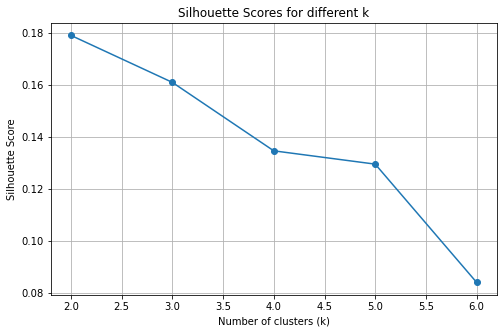

Best k by silhouette score: 2
Final cluster assignments: [1 0 0 0 1 1 1 0 1 0 0]
Adjusted Rand Index (ARI): 0.120


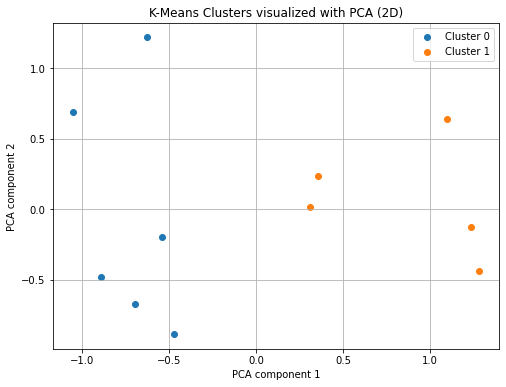

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

# X = feature matrix, y = true labels (both should be numpy arrays)
# Example: X.shape = (11, 768), y.shape = (11,)

# Step 1: Find best k using Silhouette Score
silhouette_scores = []
K_range = range(2, 7)  # test k from 2 to 6

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")

# Plot Silhouette scores vs k
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 2: Choose best k (here taking max silhouette score)
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best k by silhouette score: {best_k}")

# Step 3: Final K-Means with best k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters_final = kmeans_final.fit_predict(X)
print("Final cluster assignments:", clusters_final)

# Step 4: Evaluate clustering vs true labels
ari = adjusted_rand_score(y, clusters_final)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

# Step 5: Visualize clusters using PCA (reduce to 2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for cluster_id in range(best_k):
    plt.scatter(
        X_pca[clusters_final == cluster_id, 0], 
        X_pca[clusters_final == cluster_id, 1], 
        label=f"Cluster {cluster_id}"
    )
plt.title("K-Means Clusters visualized with PCA (2D)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.legend()
plt.grid(True)
plt.show()


In [77]:
import os
import pandas as pd

base_path = '/Users/Saravanan/patient data/'
patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318,327,325,303,306,308,309,311,313,314,315,317,335]
file_types = ['COVAREP', 'FORMANT']

features = []
labels = []  # Modify this if you have PHQ-8 scores or binary depression labels

for pid in patient_ids:
    try:
        covarep_file = os.path.join(base_path, f"{pid}_COVAREP.csv")
        formant_file = os.path.join(base_path, f"{pid}_FORMANT.csv")

        covarep_df = pd.read_csv(covarep_file)
        formant_df = pd.read_csv(formant_file)

        # Basic preprocessing (averaging across time steps)
        covarep_mean = covarep_df.mean(numeric_only=True)
        formant_mean = formant_df.mean(numeric_only=True)

        combined_features = pd.concat([covarep_mean, formant_mean])
        features.append(combined_features)

        # Placeholder label (example: 1 = depressed, 0 = not)
        # 👉 Replace this logic based on your real labels
        labels.append(1 if pid in [330, 318, 357] else 0)

        print(f"✅ Loaded data for patient {pid}")

    except Exception as e:
        print(f"❌ Failed to load data for patient {pid}: {e}")

# Final dataset
X = pd.DataFrame(features)
y = pd.Series(labels)


✅ Loaded data for patient 319
✅ Loaded data for patient 320
✅ Loaded data for patient 321
✅ Loaded data for patient 325
✅ Loaded data for patient 330
✅ Loaded data for patient 338
✅ Loaded data for patient 303
✅ Loaded data for patient 304
✅ Loaded data for patient 310
✅ Loaded data for patient 318
✅ Loaded data for patient 327
✅ Loaded data for patient 325
✅ Loaded data for patient 303
✅ Loaded data for patient 306
✅ Loaded data for patient 308
✅ Loaded data for patient 309
✅ Loaded data for patient 311
✅ Loaded data for patient 313
✅ Loaded data for patient 314
✅ Loaded data for patient 315
✅ Loaded data for patient 317
✅ Loaded data for patient 335


In [78]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Path and Patient IDs
base_path = '/Users/Saravanan/patient data/'
patient_ids = [319, 320, 321, 325, 330, 338, 303, 304, 310, 318,327,325,303,306,308,309,311,313,314,315,317,335]  # 312 removed

X = []
y = []  # Placeholder for labels (e.g., 0 = not depressed, 1 = depressed)

for pid in patient_ids:
    try:
        covarep_file = os.path.join(base_path, f'{pid}_COVAREP.csv')
        formant_file = os.path.join(base_path, f'{pid}_FORMANT.csv')
        
        df_covarep = pd.read_csv(covarep_file).dropna()
        df_formant = pd.read_csv(formant_file).dropna()

        # Average across time (rows) to make a fixed-size feature vector
        covarep_mean = df_covarep.mean().values
        formant_mean = df_formant.mean().values

        features = np.concatenate([covarep_mean, formant_mean])
        X.append(features)

        # Dummy binary label (randomized just for example)
        y.append(np.random.randint(0, 2))  # Replace with actual labels when available

    except Exception as e:
        print(f"❌ Patient {pid}: Failed to load/merge data – {e}")

X = np.array(X)
y = np.array(y)
print("✅ Feature shape:", X.shape)


✅ Feature shape: (22, 79)


In [110]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=700, max_depth=12, random_state=79)

rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf_model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.5714285714285714
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.50      0.33      0.40         3

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7

